In [2]:
# Importing the pandas library as pd to work with data structures like DataFrames
import pandas as pd

# Importing the numpy library as np for numerical operations and working with arrays
import numpy as np

# Importing the pyplot module from matplotlib as plt to create visualizations like charts and plots
import matplotlib.pyplot as plt

# Ensures that plots are displayed inline in Jupyter notebooks (within the notebook itself)
%matplotlib inline

### **Lets load the Boston House Pricing Dataset**

In [7]:
# Importing the pandas library as 'pd' for data manipulation and analysis
import pandas as pd

# Reading a CSV file ('boston.csv') from the specified path using pandas' read_csv method
# The file path is 'F:\Predicting-Boston-House-Prices\Dataset\boston.csv'
# The result is stored in the variable 'df' as a pandas DataFrame
dataset = pd.read_csv(r'F:\Predicting-Boston-House-Prices\Dataset\boston.csv')

# Displaying the first 5 rows of the DataFrame 'df' to get an overview of the dataset
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### **Preparing The Dataset**

In [8]:
# Rename the column to 'PRICE' (if the original column name is 'MEDV')
dataset = dataset.rename(columns={'MEDV': 'PRICE'})  # Adjust 'MEDV' to the actual column name if needed

# Save the updated DataFrame to a new CSV file at the specified location
dataset.to_csv(r'F:\Predicting-Boston-House-Prices\Dataset\updated_boston.csv', index=False)

# Display the first few rows to verify the column renaming and check the updated DataFrame
dataset.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
# Displaying concise summary of the DataFrame 'dataset' using the info() method
# This will provide information about:
# - The total number of rows and columns
# - The data type of each column
# - The number of non-null (non-missing) entries in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
# Summarizing the statistics of the dataset using the describe() method
# This will provide:
# - Count: The number of non-null entries in each column
# - Mean: The average value of each numerical column
# - Standard deviation: The spread or variability of the data
# - Min and Max: The minimum and maximum values in each numerical column
# - Quartiles: The 25th, 50th (median), and 75th percentiles (Q1, Q2, Q3) for each numerical column
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# Checking for missing (null) values in the dataset
# The isnull() method returns a DataFrame of the same shape as 'dataset', where each entry is True if the value is missing, and False if it is not.
# The sum() method then calculates the total number of missing values (True values) in each column.
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### **Detecting Outliers with Box and Whisker Plots**
A Box Plot provides a visual depiction of numerical data distribution and aids in outlier detection. It efficiently summarizes data using a simple box and whiskers, facilitating easy comparison of distribution across different groups.

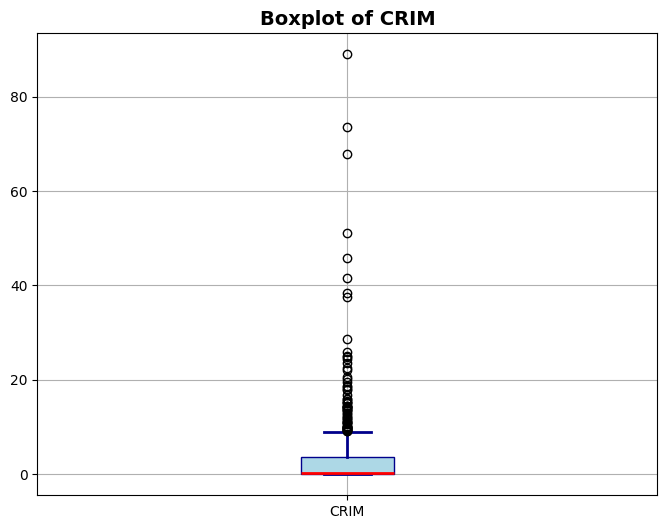

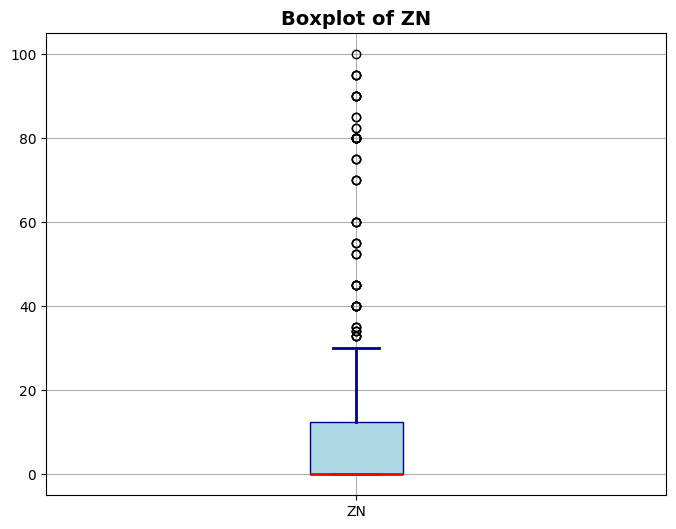

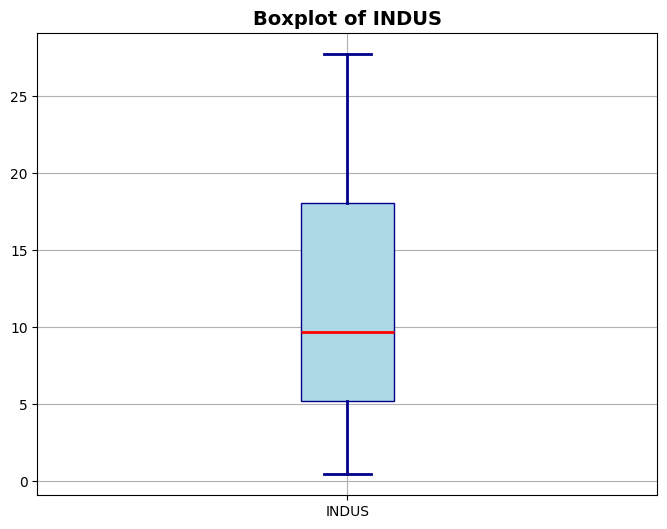

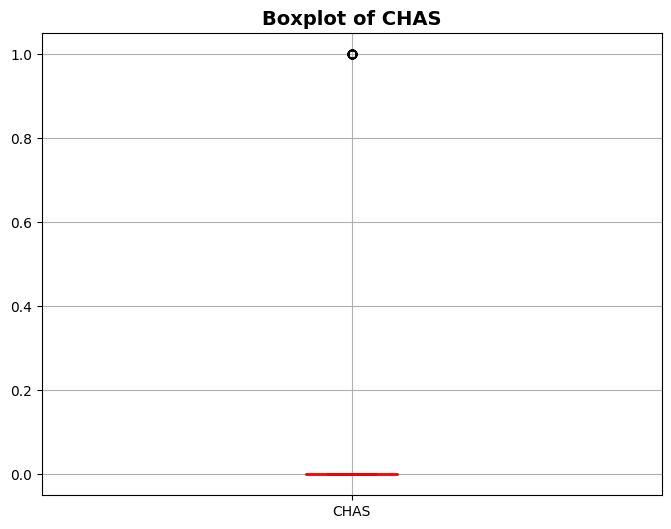

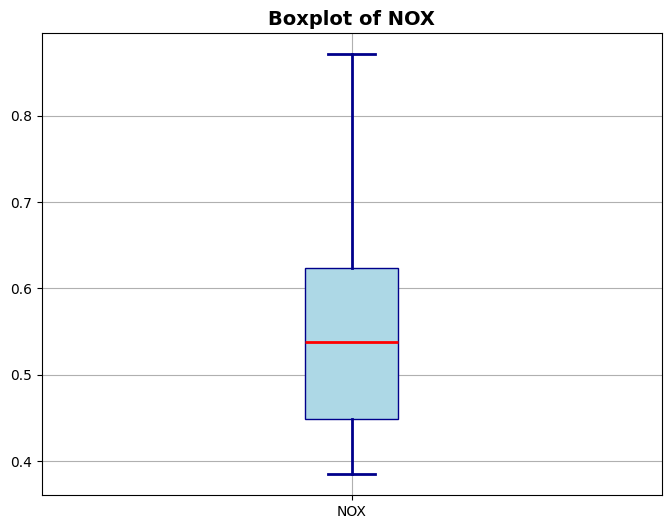

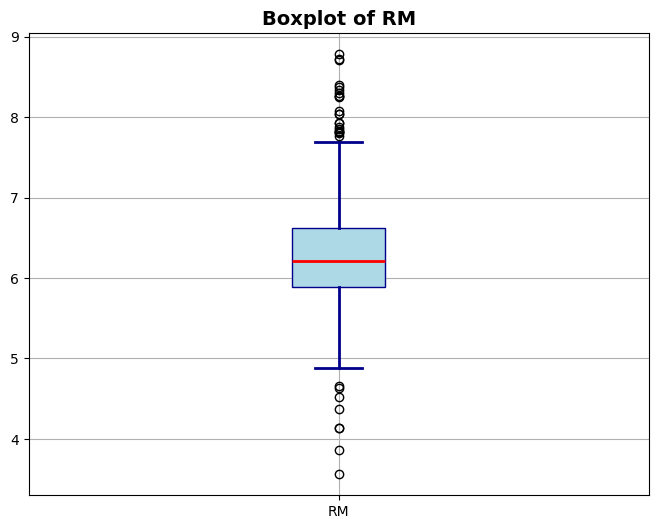

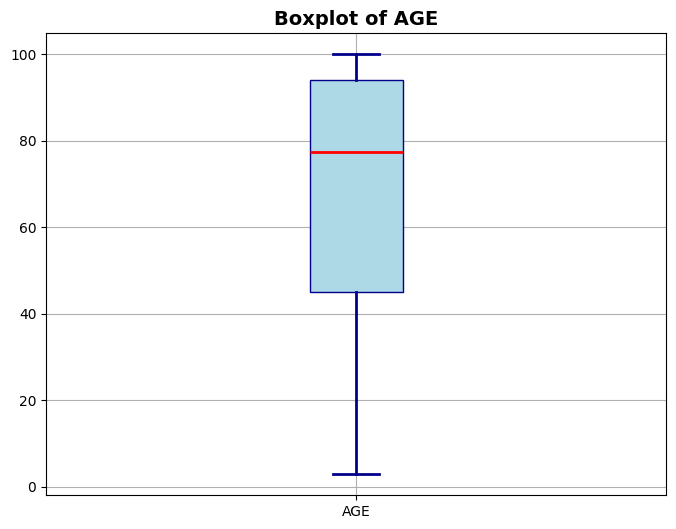

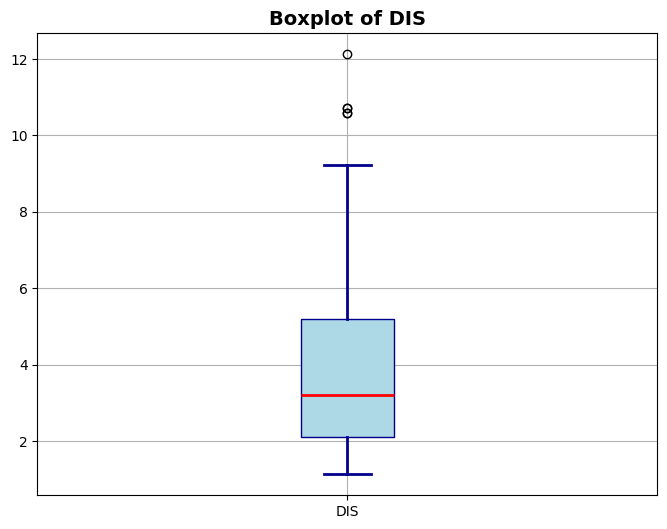

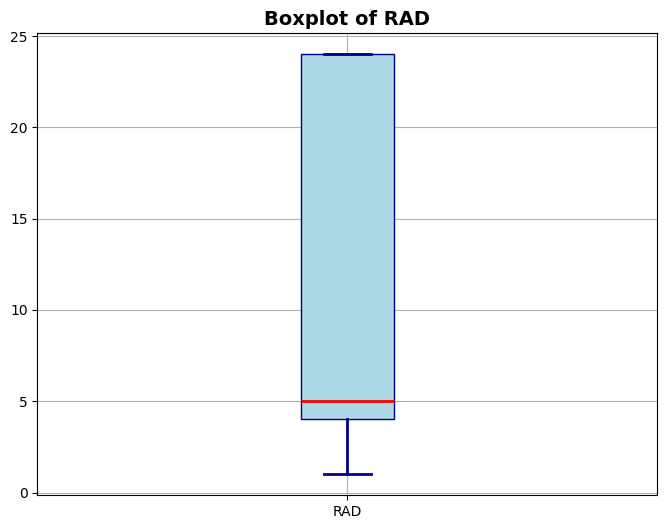

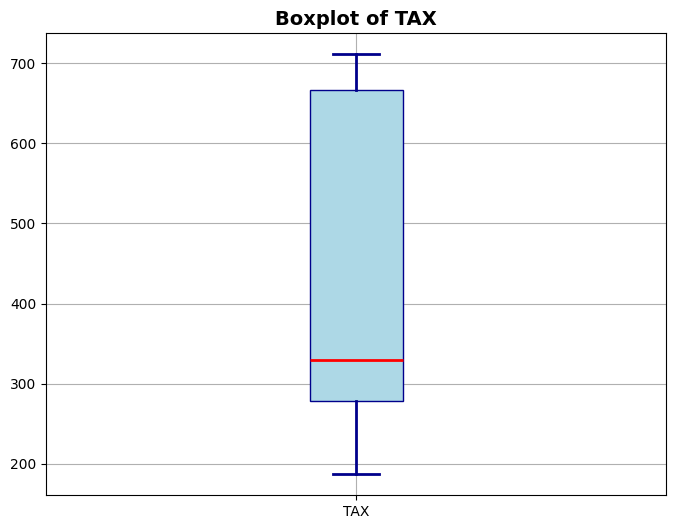

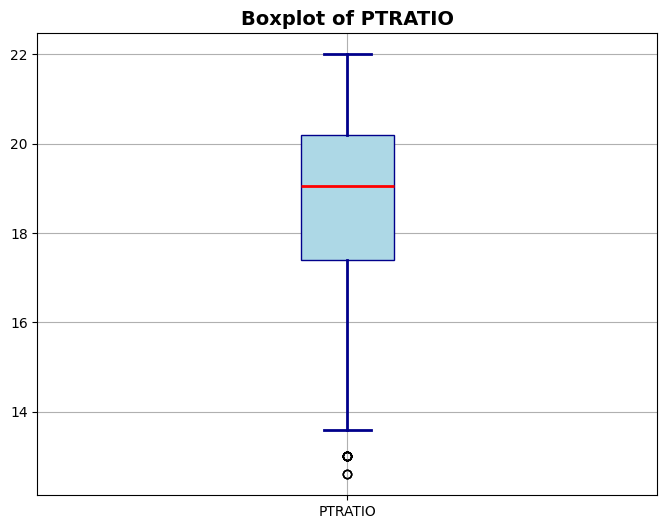

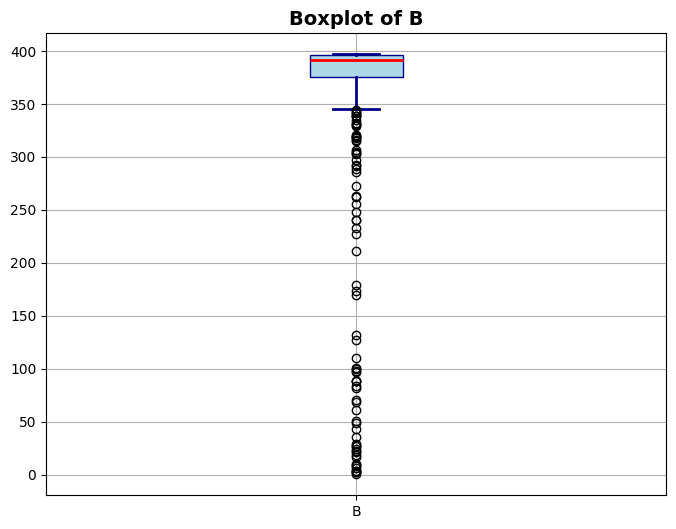

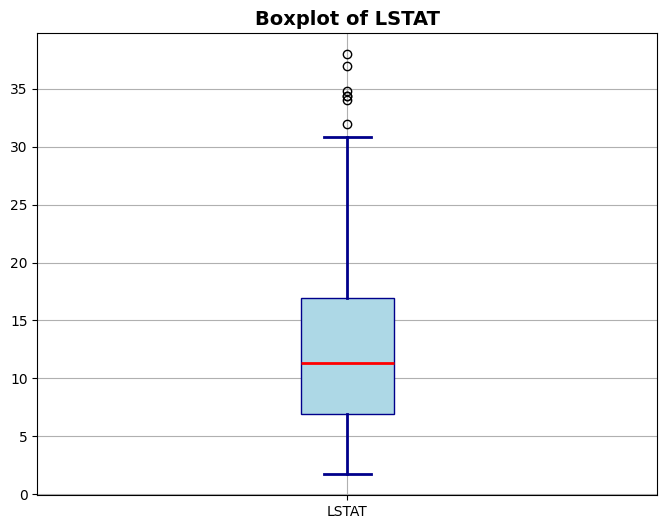

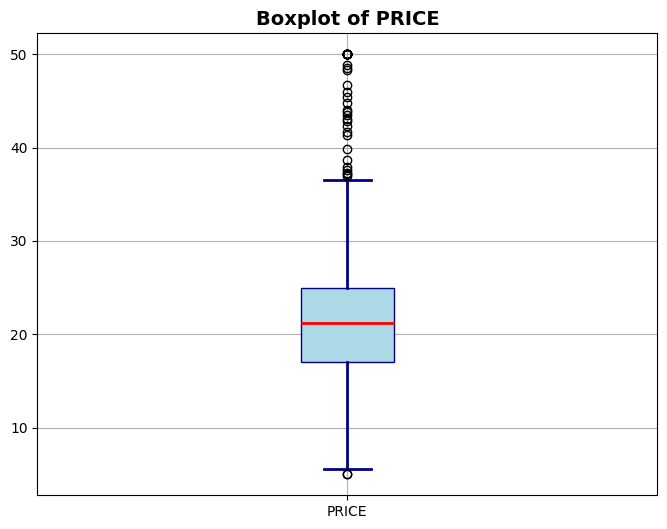

In [12]:
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame 'dataset'
for column in dataset:
    
    # Check if the column is numerical (using 'pd.DataFrame.select_dtypes' or 'column.dtype' method)
    if dataset[column].dtype in ['int64', 'float64']:  # Check if the column's data type is numeric
        
        # Create a new figure for each numeric column to plot
        plt.figure(figsize=(8, 6))
        
        # Set the title of the plot to the name of the column
        plt.gca().set_title(f"Boxplot of {column}", fontsize=14, fontweight='bold')
        
        # Draw a boxplot for the current numeric column with professional colors
        dataset.boxplot([column], patch_artist=True, 
                        boxprops=dict(facecolor='lightblue', color='darkblue'),
                        whiskerprops=dict(color='darkblue', linewidth=2),
                        capprops=dict(color='darkblue', linewidth=2),
                        medianprops=dict(color='red', linewidth=2))
        
        # Display the plot for the current column
        plt.show()


#### **Outlier Detection and Handling Using Interquartile Range (IQR)**
The Interquartile Range (IQR) is a statistical measure of dispersion, representing the range between the first quartile (Q₁) and the third quartile (Q₃) of a dataset. It is calculated by subtracting the first quartile from the third quartile:

### **Steps to Perform Outlier Detection by Identifying the Lower and Upper Bounds**

To detect outliers in your data, follow these steps:

1. **Arrange your data in ascending order.**
2. **Calculate Q1** (the first quartile).
3. **Calculate Q3** (the third quartile).
4. **Find IQR**:  

IQR = Q₃ - Q₁

5. **Find the lower range**:  

Lower Range = Q₁ - (1.5 * IQR)

6. **Find the upper range**:  

Upper Range = Q₃ + (1.5 * IQR)


Any data points **below the lower range** or **above the upper range** are considered outliers.



In [19]:
import pandas as pd

# Assuming 'dataset' is your original DataFrame and 'treated_dataset' is a copy for modification
outliers = {}
treated_dataset = dataset.copy()  # Make a copy of the dataset for modification

# Loop through each numeric column in the DataFrame
for column in treated_dataset.select_dtypes(include=['int64', 'float64']).columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = treated_dataset[column].quantile(0.25)
    Q3 = treated_dataset[column].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers and store them in the dictionary
    outliers[column] = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)][column]
    
    # Replace outliers with the respective thresholds in the treated dataset
    treated_dataset[column] = treated_dataset[column].clip(lower=lower_bound, upper=upper_bound)

# Print outliers before replacement for each column
for column, outlier_data in outliers.items():
    print(f"Outliers in column '{column}' before replacement:")
    print(outlier_data)
    print("\n" + "-" * 50 + "\n")

# Print the treated dataset after replacing outliers with thresholds
print("\nTreated dataset after replacing outliers with thresholds:")
print(treated_dataset.head())  # Display the first few rows of the treated dataset

# Optionally, save the modified dataset with treated outliers to a CSV file
treated_dataset.to_csv('treated_dataset_with_outliers.csv', index=False)

# Calculate and print the total number of outliers before replacement
total_outliers = sum(len(outliers[column]) for column in outliers)
print(f"\nTotal number of outliers across all columns before replacement: {total_outliers}")


Outliers in column 'CRIM' before replacement:
Series([], Name: CRIM, dtype: float64)

--------------------------------------------------

Outliers in column 'ZN' before replacement:
Series([], Name: ZN, dtype: float64)

--------------------------------------------------

Outliers in column 'INDUS' before replacement:
Series([], Name: INDUS, dtype: float64)

--------------------------------------------------

Outliers in column 'CHAS' before replacement:
Series([], Name: CHAS, dtype: float64)

--------------------------------------------------

Outliers in column 'NOX' before replacement:
Series([], Name: NOX, dtype: float64)

--------------------------------------------------

Outliers in column 'RM' before replacement:
Series([], Name: RM, dtype: float64)

--------------------------------------------------

Outliers in column 'AGE' before replacement:
Series([], Name: AGE, dtype: float64)

--------------------------------------------------

Outliers in column 'DIS' before replacement:

In [20]:
treated_dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### **Box and Whisker Plots After Outlier Removal**

The following boxplots display the distribution of data for each numeric column in the dataset **after** outliers were identified and replaced with the respective thresholds. These plots give an overview of the cleaned data, helping to assess how the outlier removal impacted the overall distribution.


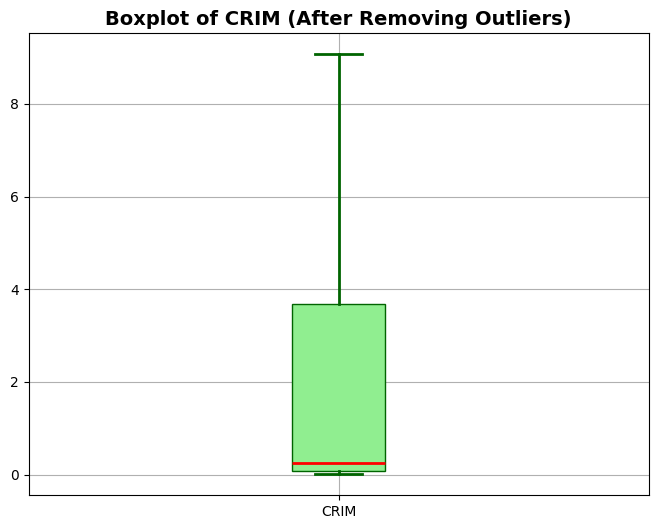

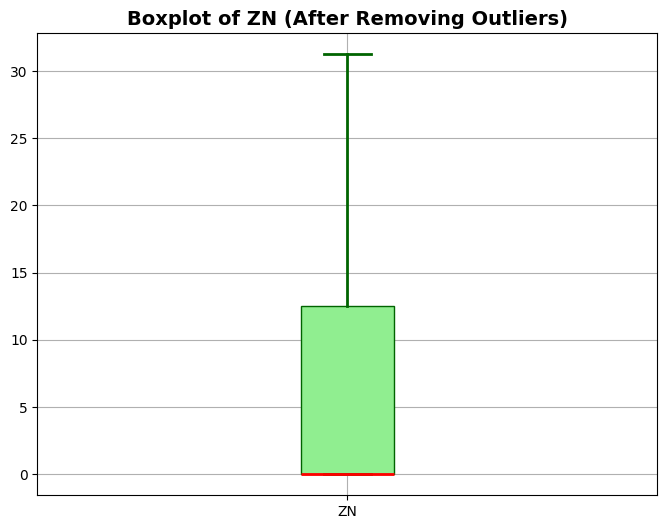

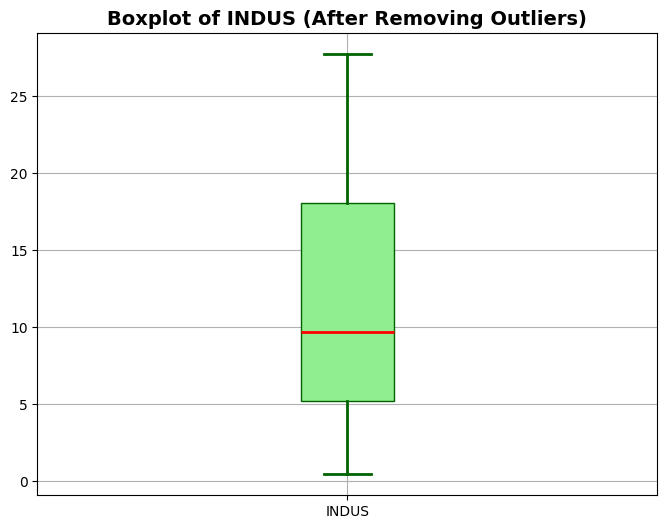

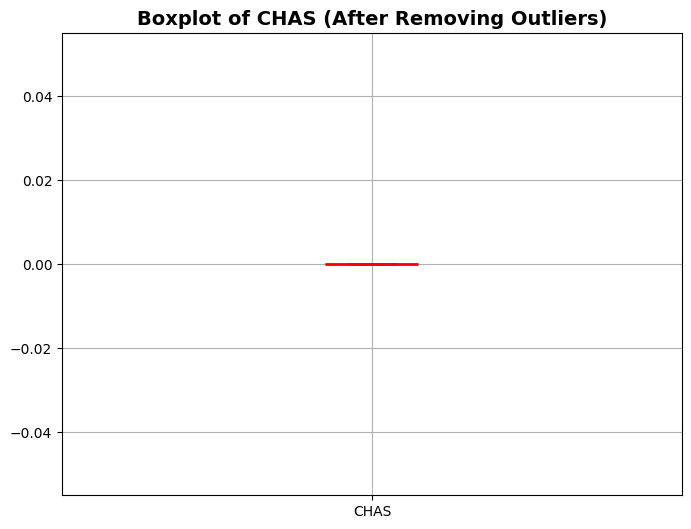

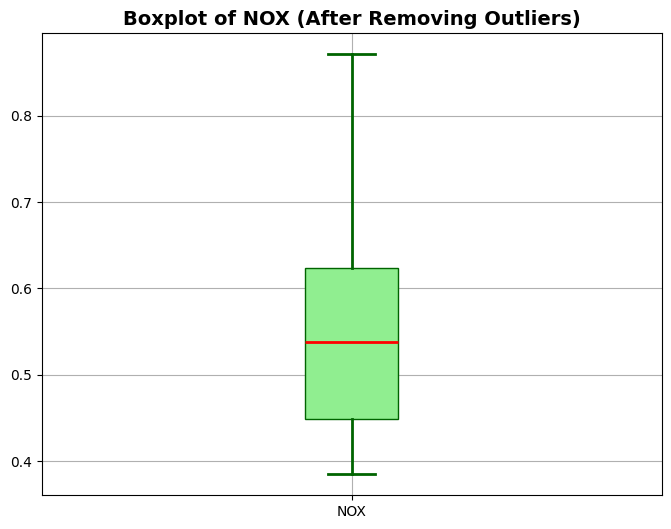

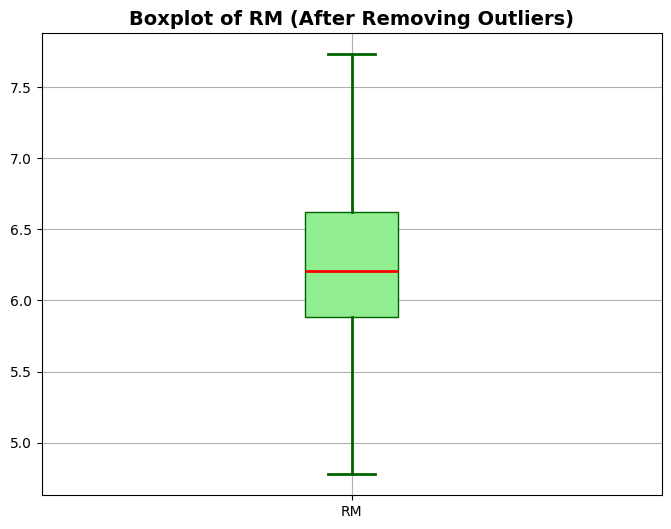

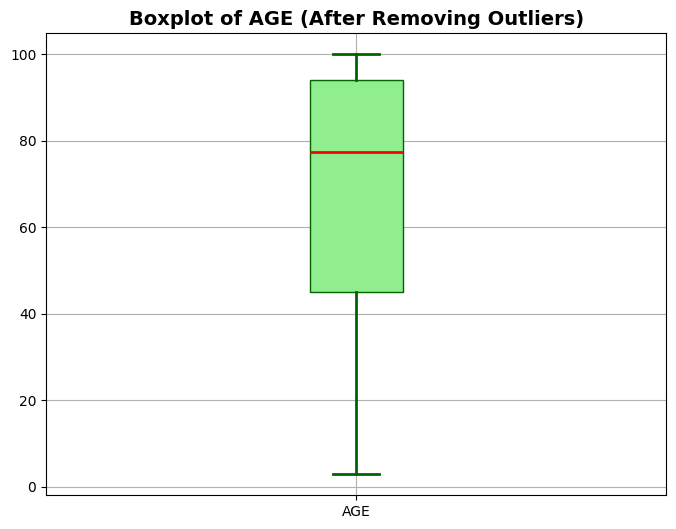

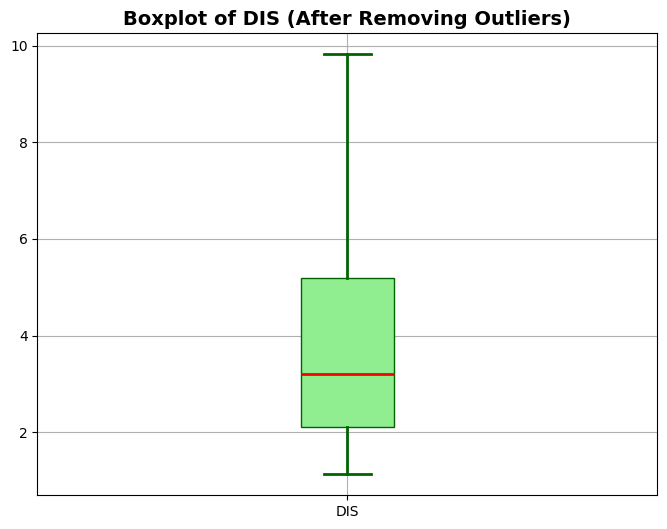

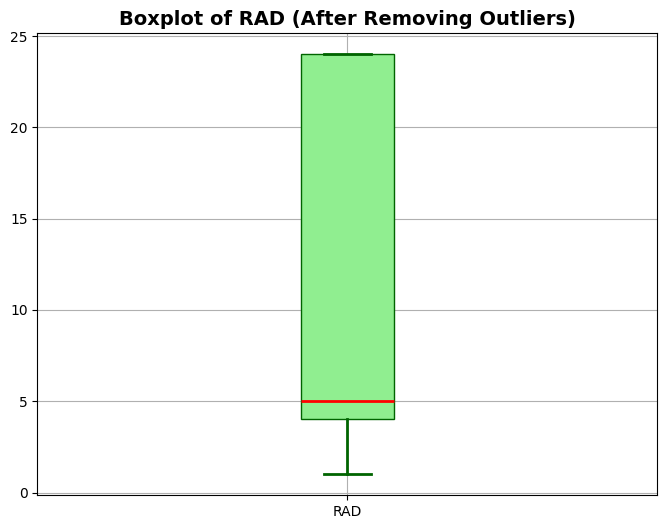

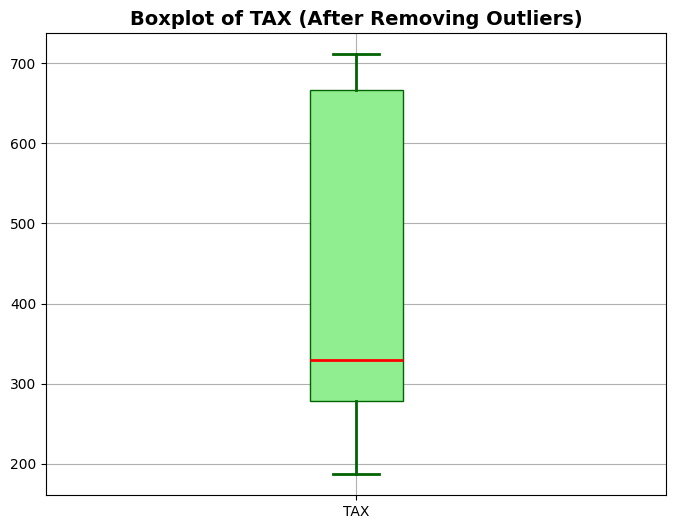

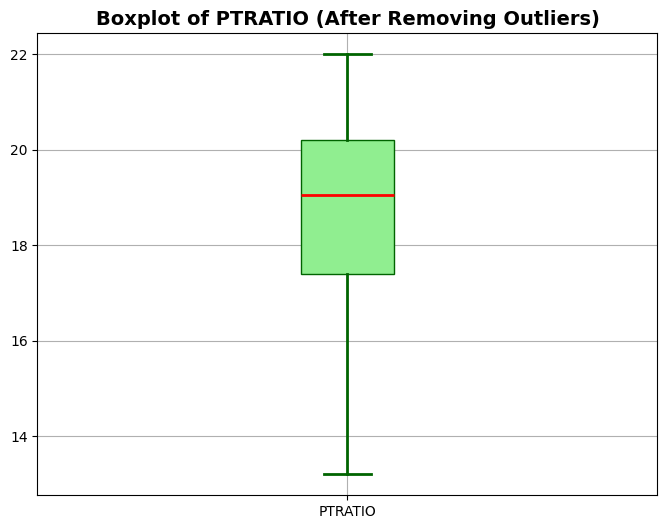

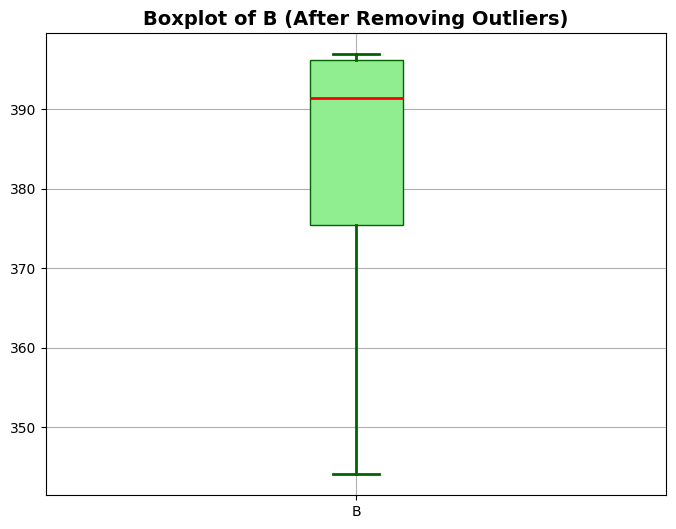

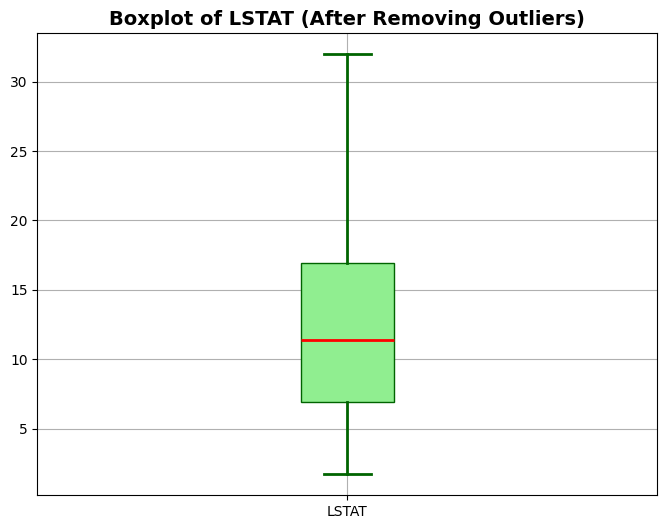

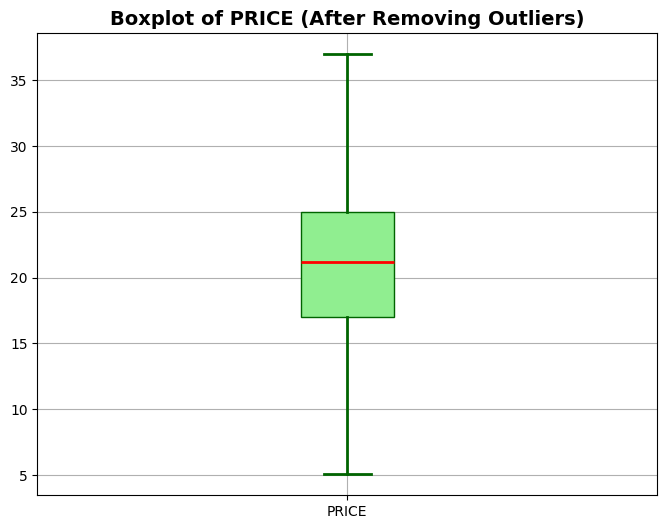

In [23]:
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame 'treated_dataset' after removing outliers
for column in treated_dataset:
    # Check if the column is numeric
    if treated_dataset[column].dtype in ['int64', 'float64']:
        
        # Create a new figure for each numeric column
        plt.figure(figsize=(8, 6))
        
        # Set the title of the plot to the name of the column
        plt.gca().set_title(f"Boxplot of {column} (After Removing Outliers)", fontsize=14, fontweight='bold')
        
        # Draw a boxplot for the current numeric column after removing outliers
        treated_dataset.boxplot([column], patch_artist=True, 
                                boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                                whiskerprops=dict(color='darkgreen', linewidth=2),
                                capprops=dict(color='darkgreen', linewidth=2),
                                medianprops=dict(color='red', linewidth=2))
        
        # Display the plot for the current column
        plt.show()


####  **Analyzing The Correlated Features**

In [28]:
# Perform Exploratory Data Analysis (EDA) to analyze correlations between numerical columns in the dataset.
# The corr() method computes the pairwise correlation of numerical columns in the DataFrame.
# It generates a correlation matrix that highlights how each pair of features is related.
# A correlation value close to 1 indicates a strong positive relationship, 
# while a value close to -1 indicates a strong negative relationship.
# Values close to 0 suggest that there is little to no linear correlation between the two features.

correlation_matrix = treated_dataset.corr()

# Display the correlation matrix
correlation_matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.370213,0.629315,NaN,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.538589
ZN,-0.370213,1.000000,-0.584079,NaN,-0.549670,0.357439,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.428126
INDUS,0.629315,-0.584079,1.000000,NaN,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.561174
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.663412,-0.549670,0.763651,NaN,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.506505
RM,-0.260057,0.357439,-0.408704,NaN,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.697645
AGE,0.518951,-0.583149,0.644779,NaN,0.731470,-0.258788,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.458662
DIS,-0.555054,0.681019,-0.713079,NaN,-0.775934,0.224486,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.333079
RAD,0.926977,-0.344043,0.595129,NaN,0.611441,-0.206041,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.452679
TAX,0.870686,-0.383860,0.720760,NaN,0.668023,-0.292737,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.543545


f:\Predicting-Boston-House-Prices\myenhp\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
f:\Predicting-Boston-House-Prices\myenhp\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
f:\Predicting-Boston-House-Prices\myenhp\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
f:\Predicting-Boston-House-Prices\myenhp\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
f:\Predicting-Boston-House-Prices\myenhp\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
f:\Predicting-Boston-House-Pri

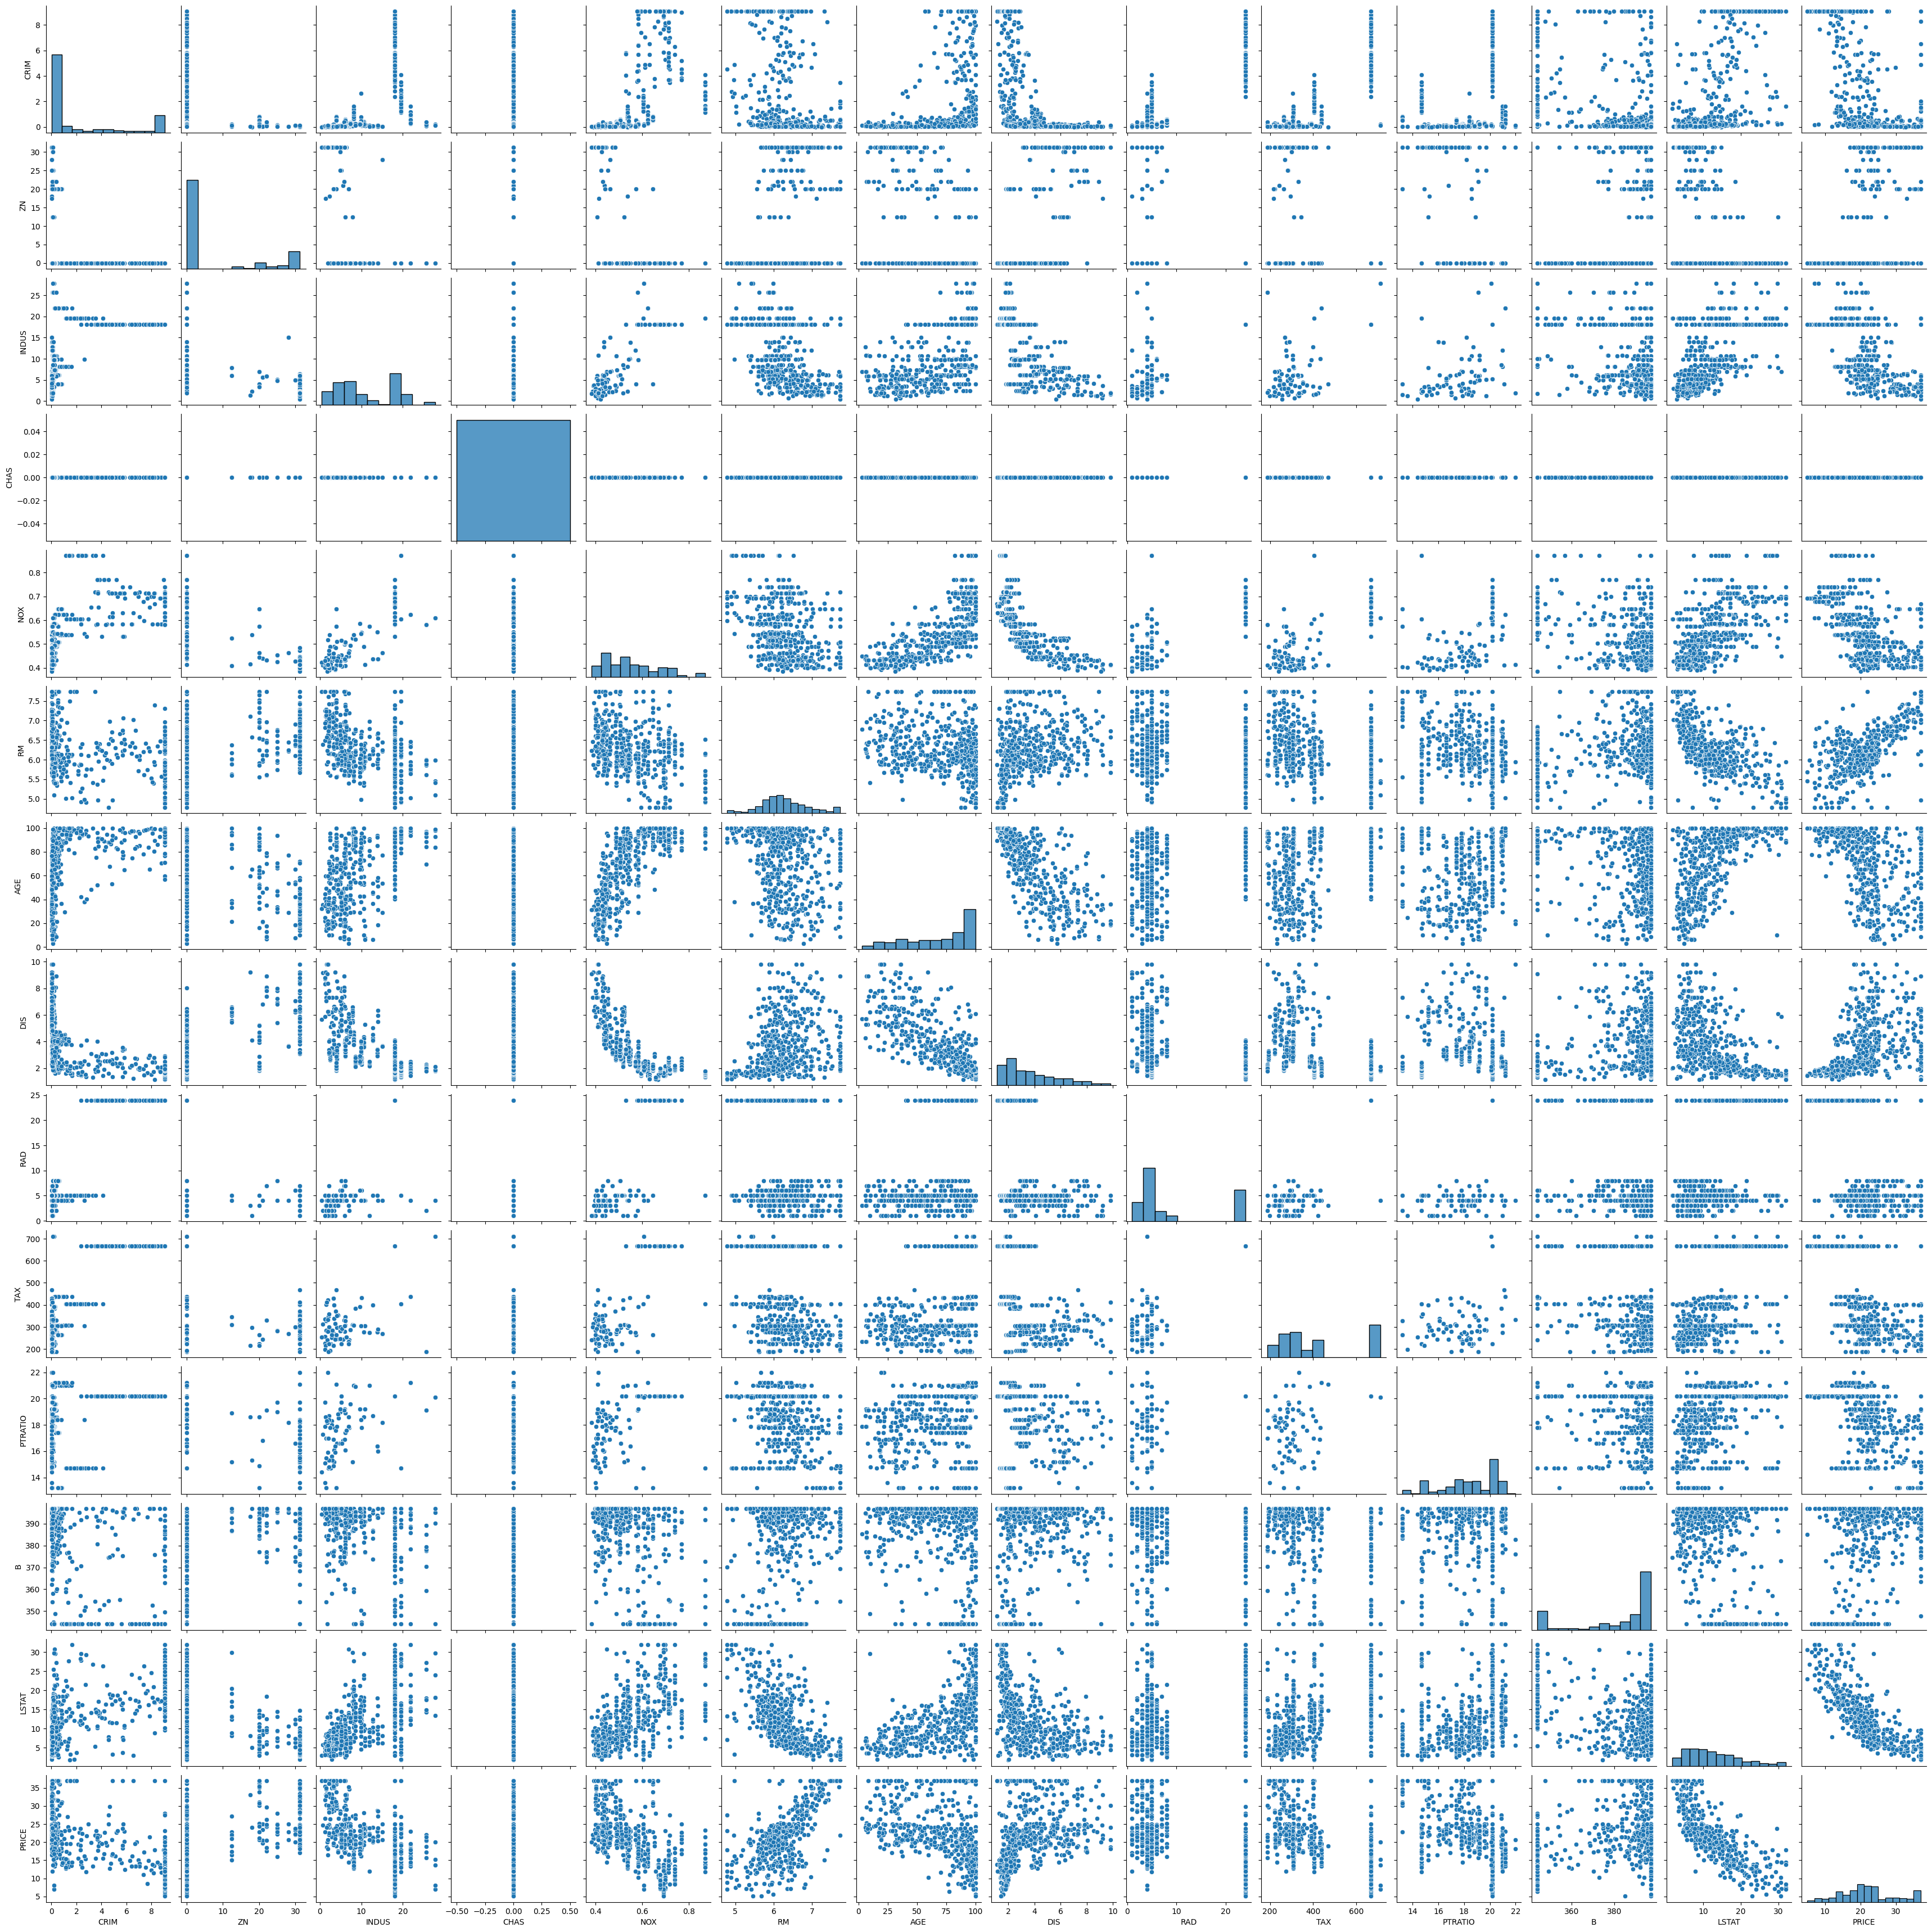

In [29]:
# Import the seaborn library for enhanced data visualization
import seaborn as sns

# Generate a pairplot with a professional color palette
# The 'palette' argument allows you to choose an aesthetic color scheme for the plots
# Common professional palettes include 'muted', 'dark', 'deep', or 'colorblind'.
sns.pairplot(treated_dataset, palette='muted')

# Alternatively, you can choose other palettes like 'deep', 'dark', or 'pastel' for different visual effects.
# Example: sns.pairplot(treated_dataset, palette='deep')

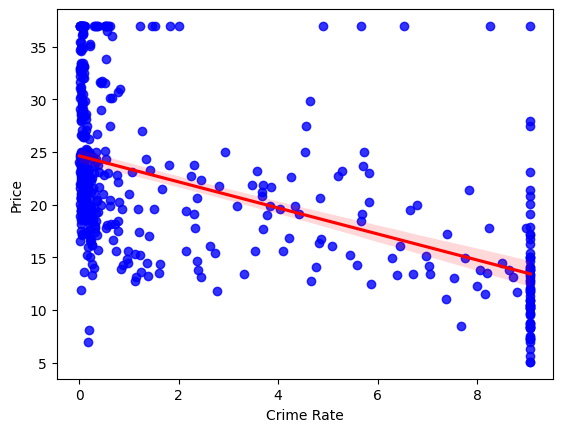

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot between 'CRIM' (crime rate) and 'PRICE' (house prices)
sns.regplot(x='CRIM', y='PRICE', data= treated_dataset, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add labels to the plot
plt.xlabel("Crime Rate")
plt.ylabel("Price")

# Display the plot
plt.show()

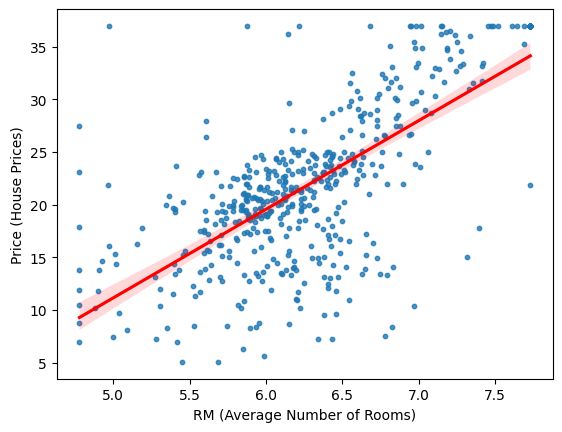

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a regression plot between 'RM' (average number of rooms) and 'PRICE' (house prices)
# This plot will show both the scatter plot and the fitted line (best-fit line)
sns.regplot(x='RM', y='PRICE', data=treated_dataset, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Adding labels to the plot
plt.xlabel("RM (Average Number of Rooms)")
plt.ylabel("Price (House Prices)")

# Display the plot
plt.show()


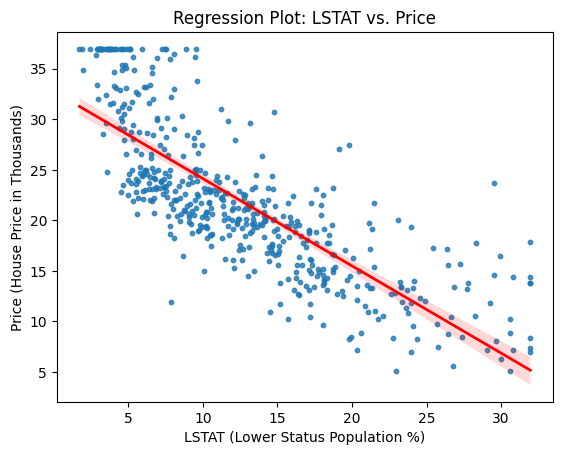

In [32]:
# Importing seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a regression plot to visualize the relationship between 'LSTAT' and 'PRICE'
# This plot will show both the scatter plot and a fitted regression line, helping to understand if there's a linear trend

sns.regplot(x="LSTAT", y="PRICE", data=treated_dataset, scatter_kws={"s": 10}, line_kws={"color": "red", "lw": 2})

# Adding labels to the axes
plt.xlabel("LSTAT (Lower Status Population %)")  # X-axis label
plt.ylabel("Price (House Price in Thousands)")  # Y-axis label

# Title for the plot
plt.title("Regression Plot: LSTAT vs. Price")

# Displaying the plot
plt.show()

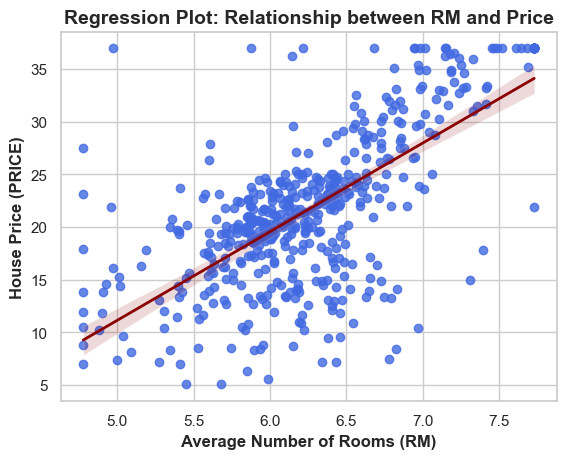

In [33]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better visual appeal
sns.set(style="whitegrid")

# Set a professional color palette
sns.set_palette("muted")

# Create a regression plot to visualize the relationship between 'RM' and 'Price'
sns.regplot(x="RM", y="PRICE", data=treated_dataset, scatter_kws={'color': 'royalblue'}, line_kws={'color': 'darkred', 'lw': 2})

# Set axis labels for clarity
plt.xlabel("Average Number of Rooms (RM)", fontsize=12, weight='bold')
plt.ylabel("House Price (PRICE)", fontsize=12, weight='bold')

# Set the title for the plot
plt.title("Regression Plot: Relationship between RM and Price", fontsize=14, weight='bold')

# Display the plot to understand the relationship between 'RM' and 'Price'
plt.show()

C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_15744\922946857.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CHAS", y="PRICE", data= treated_dataset,


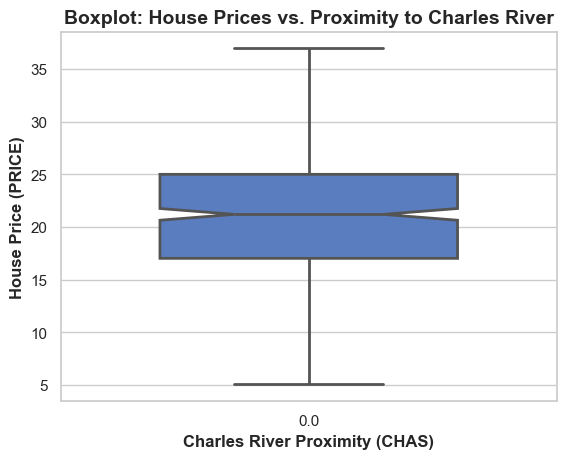

In [34]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better visual appeal
sns.set(style="whitegrid")

# Set a professional color palette
sns.set_palette("pastel")

# Create a boxplot to compare the distribution of house prices for 'CHAS' values (near the Charles River or not)
sns.boxplot(x="CHAS", y="PRICE", data= treated_dataset, 
            palette="muted", 
            linewidth=2,  # Adjust the thickness of the boxplot lines
            fliersize=6,  # Make the outliers slightly larger for better visibility
            notch=True,  # Notched boxplot for more statistical insight
            width=0.6)  # Adjust the width of the boxes

# Add labels and title to enhance the plot
plt.xlabel("Charles River Proximity (CHAS)", fontsize=12, weight='bold')
plt.ylabel("House Price (PRICE)", fontsize=12, weight='bold')
plt.title("Boxplot: House Prices vs. Proximity to Charles River", fontsize=14, weight='bold')

# Display the plot
plt.show()


<Axes: xlabel='PTRATIO', ylabel='PRICE'>

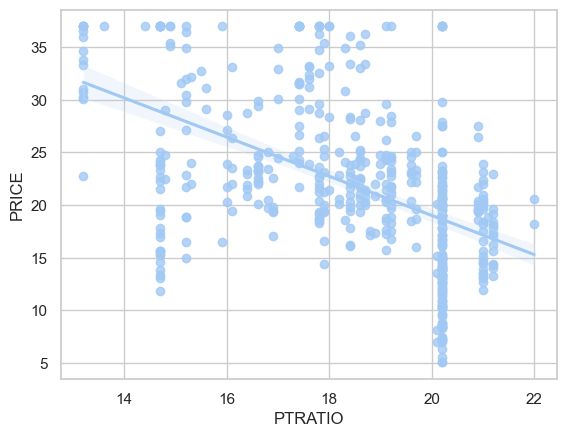

In [37]:
# Create a regression plot to visualize the relationship between PTRATIO and PRICE
# regplot() creates a scatter plot with a fitted regression line, showing the linear relationship between the two variables.
# The 'x' parameter specifies the predictor variable (PTRATIO), and the 'y' parameter specifies the target variable (PRICE).
# The 'data' parameter provides the dataset from which the variables are drawn.
sns.regplot(x="PTRATIO", y="PRICE", data=treated_dataset)

# Optionally, you can also customize the plot, such as adding a line of best fit or adjusting other aesthetics.

#### Define independent (predictor) and dependent (target) features

In [38]:
# Define independent (predictor) and dependent (target) features

# 'X' represents the independent features (all columns except the last one)
X = dataset.iloc[:, :-1]

# 'y' represents the dependent feature (the last column)
y = dataset.iloc[:, -1]


In [39]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [40]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [42]:
# Importing the train_test_split function from sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# 'X' contains the independent features and 'y' contains the dependent feature
# test_size=0.3 means 30% of the data will be used for testing and 70% for training
# random_state=42 ensures that the split is reproducible, so the same split occurs each time the code is run

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.029850,0.00,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12000,5.21
116,0.131580,0.00,10.01,0.0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30000,12.04
45,0.171420,0.00,6.91,0.0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90000,10.21
16,1.053930,0.00,8.14,0.0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85000,6.58
468,9.069639,0.00,18.10,0.0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74000,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.171200,0.00,8.56,0.0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67000,18.66
270,0.299160,20.00,6.96,0.0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65000,13.00
348,0.015010,31.25,2.01,0.0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94000,5.99
435,9.069639,0.00,18.10,0.0,0.740,6.629,94.6,2.1247,24,666.0,20.2,344.10625,23.27


In [44]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.091780,0.00,4.05,0.0,0.510,6.4160,84.1,2.6463,5,296.0,16.6,395.50000,9.04
274,0.056440,31.25,6.41,0.0,0.447,6.7580,32.9,4.0776,4,254.0,17.6,396.90000,3.53
491,0.105740,0.00,27.74,0.0,0.609,5.9830,98.8,1.8681,4,711.0,20.1,390.11000,18.07
72,0.091640,0.00,10.81,0.0,0.413,6.0650,7.8,5.2873,4,305.0,19.2,390.91000,5.52
452,5.090170,0.00,18.10,0.0,0.713,6.2970,91.8,2.3682,24,666.0,20.2,385.09000,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.069639,0.00,18.10,0.0,0.740,6.4060,97.2,2.0651,24,666.0,20.2,385.96000,19.52
23,0.988430,0.00,8.14,0.0,0.538,5.8130,100.0,4.0952,4,307.0,21.0,394.54000,19.88
225,0.526930,0.00,6.20,0.0,0.504,7.7305,83.0,2.8944,8,307.0,17.4,382.00000,4.63
433,5.581070,0.00,18.10,0.0,0.713,6.4360,87.9,2.3158,24,666.0,20.2,344.10625,16.22


### **Standardizing the Dataset for Model Training**


In [45]:
# Importing StandardScaler from sklearn.preprocessing to standardize the dataset
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
# StandardScaler standardizes the dataset by removing the mean and scaling it to unit variance
# This process helps ensure that features are on the same scale, which is important for many machine learning algorithms
scaler = StandardScaler()


In [47]:
# Standardizing the training data using the scaler
# 'fit_transform()' first calculates the mean and standard deviation for each feature in the training set (X_train),
# then applies the transformation by scaling each feature to have a mean of 0 and a standard deviation of 1.
X_train = scaler.fit_transform(X_train)


In [48]:
# Standardizing the test data using the already fitted scaler
# 'transform()' applies the scaling (mean=0, std=1) computed from the training data (X_train)
# This ensures the test data is scaled in the same way as the training data, without recalculating the statistics.
X_test = scaler.transform(X_test)

f:\Predicting-Boston-House-Prices\myenhp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [49]:
# Importing the pickle module to save the scaler object to a file
import pickle

# Saving the fitted StandardScaler object to a file for future use
# 'open('scaling.pkl', 'wb')' opens a file called 'scaling.pkl' in write-binary mode ('wb').
# pickle.dump() serializes the 'scaler' object and writes it to the file so it can be loaded later.
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [50]:
X_train

array([[-0.6618166 , -0.59822673, -1.29214218, ...,  0.18443366,
         0.62325696, -1.02671247],
       [-0.63080433, -0.59822673, -0.16208345, ..., -0.21969677,
         0.57942789, -0.04915349],
       [-0.61865916, -0.59822673, -0.60948856, ..., -0.17479339,
         0.77184822, -0.31107632],
       ...,
       [-0.66634055,  1.96709285, -1.3166773 , ..., -0.57892382,
         0.45328567, -0.91507323],
       [ 2.09395177, -0.59822673,  1.00549958, ...,  0.85798439,
        -2.04998264,  1.55816531],
       [-0.60117913, -0.59822673, -0.37135358, ...,  1.17230806,
        -2.04998264, -0.25096288]], shape=(354, 13))

In [51]:
X_test

array([[9.17800000e-02, 4.51616146e-17, 4.05000000e+00, ...,
        1.66000000e+01, 3.95500000e+02, 9.04000000e+00],
       [5.64400000e-02, 3.12500000e+01, 6.41000000e+00, ...,
        1.76000000e+01, 3.96900000e+02, 3.53000000e+00],
       [1.05740000e-01, 4.51616146e-17, 2.77400000e+01, ...,
        2.01000000e+01, 3.90110000e+02, 1.80700000e+01],
       ...,
       [5.26930000e-01, 4.51616146e-17, 6.20000000e+00, ...,
        1.74000000e+01, 3.82000000e+02, 4.63000000e+00],
       [5.58107000e+00, 4.51616146e-17, 1.81000000e+01, ...,
        2.02000000e+01, 3.44106250e+02, 1.62200000e+01],
       [9.06963875e+00, 4.51616146e-17, 1.81000000e+01, ...,
        2.02000000e+01, 3.88520000e+02, 1.64400000e+01]], shape=(152, 13))

### **Model Training: Linear Regression**


In [52]:
# Importing the LinearRegression class from the sklearn.linear_model module
# This class is used for performing linear regression, which models the relationship between independent variables (features) 
# and the dependent variable (target).
from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression model
# The 'regression' object will be used to fit the training data and make predictions
regression = LinearRegression()

In [53]:
# Training the Linear Regression model using the training data
# 'fit()' method is used to train the model by finding the best-fit line based on the provided data (X_train and y_train)
# X_train: Independent features (predictors) from the training data
# y_train: Dependent feature (target) from the training data
regression.fit(X_train, y_train)


LinearRegression()

In [54]:
# Printing the coefficients of the trained linear regression model
# The coefficients represent the weights assigned to each feature in the model.
# They show the change in the dependent variable (target) for a one-unit change in the corresponding feature, holding all other features constant.
print(regression.coef_)

[-2.17190783e+00  5.03090876e-01  6.31138951e-02 -2.22044605e-16
 -1.18227752e+00  2.06555288e+00 -4.99282358e-01 -2.24576935e+00
  2.55963565e+00 -1.22081362e+00 -1.75277545e+00  2.73329147e-01
 -3.45005534e+00]


In [56]:
# Printing the intercept of the trained linear regression model
# The intercept represents the value of the dependent variable (target) when all independent variables (features) are equal to zero.
# It is the point where the regression line crosses the y-axis.
print(regression.intercept_)

22.31122881355932


In [57]:
# Getting the parameters of the trained linear regression model
# The 'get_params()' method returns the hyperparameters used to configure the model.
# These include settings like the solver type, regularization strength (if applicable), and any other model-specific parameters.
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [58]:
### Prediction with Test Data

# Using the trained linear regression model to make predictions on the test dataset
# The 'predict()' method takes in the test features (X_test) and generates predicted values for the target variable (y)
# These predictions are based on the relationships the model learned during training.
reg_pred = regression.predict(X_test)

In [59]:
reg_pred

array([-313.66104648, -208.22973624, -866.7586676 , -288.894814  ,
       -767.95333363, -455.97096216, -366.29258481, -552.97242931,
       -748.70901063, -447.7988157 , -324.96461363, -363.99724154,
       -844.10088007, -445.53959491, -319.85765699, -737.24054335,
       -231.99232752, -831.23788103, -203.96235878, -779.7723945 ,
       -184.69979094, -221.21910756, -405.84122795, -297.94838907,
       -779.18180207, -789.86213872, -422.83361663, -793.31183612,
       -332.98194478, -443.92462729, -336.70149128, -289.49157089,
       -758.689684  , -745.23692545, -793.86683368, -488.56060585,
       -232.72529341, -222.18274263, -311.27636092, -298.67415241,
       -470.03061066, -193.4437557 , -165.96378241, -373.95336187,
       -283.74649452, -771.70942377, -391.07954493, -293.66382919,
       -757.44481549, -291.61012822, -345.55534943, -169.62158299,
       -379.97688843, -416.98369283, -223.36760148, -724.37106517,
       -767.43249769, -198.98432053, -250.54187246, -384.26961

## Assumptions

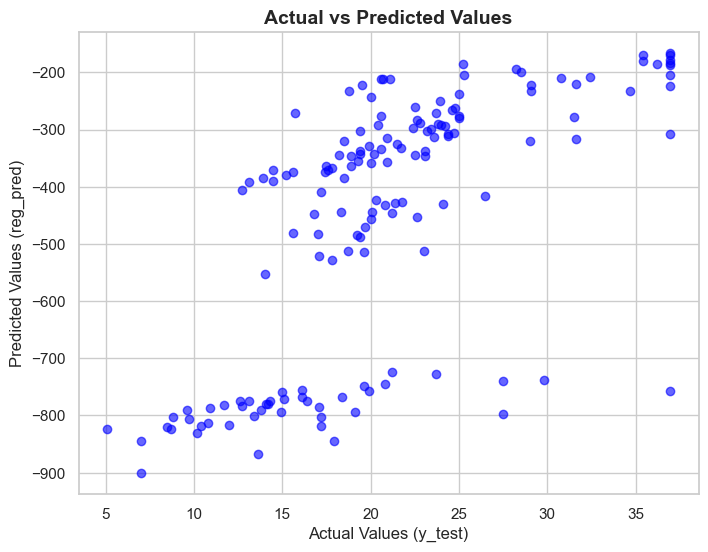

In [60]:
# Plotting a scatter plot to compare the actual vs predicted values for the target variable
# 'y_test' represents the actual values (ground truth) from the test set, and 'reg_pred' contains the predicted values
# A perfect model would have all points aligned along the diagonal line (y = x), indicating predictions match the actual values.

plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(y_test, reg_pred, color='blue', alpha=0.6)  # Scatter plot with actual values vs predicted values
plt.title('Actual vs Predicted Values', fontsize=14, fontweight='bold')  # Add a professional title
plt.xlabel('Actual Values (y_test)', fontsize=12)  # Label for the x-axis (Actual values)
plt.ylabel('Predicted Values (reg_pred)', fontsize=12)  # Label for the y-axis (Predicted values)
plt.grid(True)  # Add gridlines to the plot for better visibility
plt.show()  # Display the plot


In [61]:
## Residuals

# Calculating the residuals, which are the differences between the actual values and the predicted values
# Residuals help to assess how well the model fits the data. A residual is the error between the true value (y_test) and the predicted value (reg_pred).
# Formula: Residual = Actual Value - Predicted Value
residuals = y_test - reg_pred

In [62]:
residuals

173    337.261046
274    240.629736
491    880.358668
72     311.694814
452    784.053334
          ...    
441    803.043409
23     403.683262
225    344.346122
433    788.547027
447    787.536570
Name: PRICE, Length: 152, dtype: float64

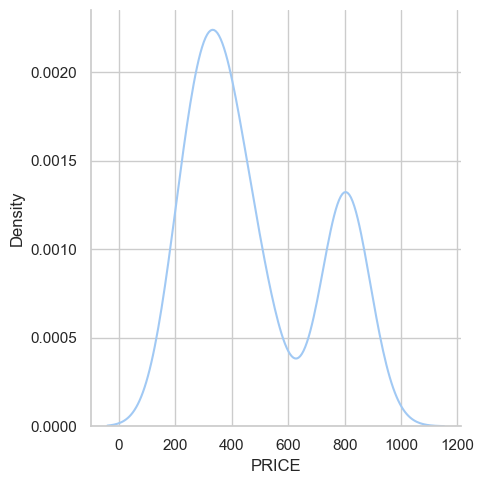

In [63]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

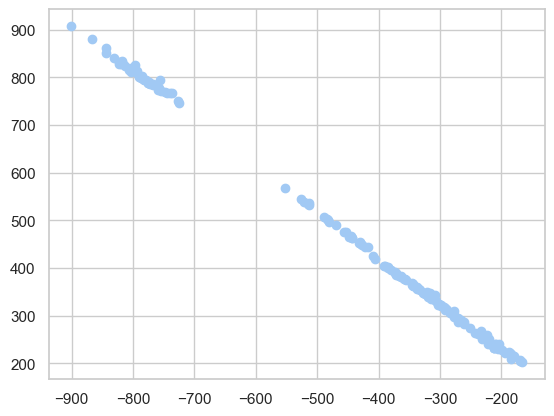

In [64]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [69]:
# Importing the necessary metrics from sklearn to evaluate model performance
# 'mean_absolute_error' computes the average of the absolute errors between actual and predicted values
# 'mean_squared_error' computes the average of the squared differences between actual and predicted values
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calculating and printing the Mean Absolute Error (MAE)
# MAE gives the average absolute difference between the actual and predicted values. 
# A lower MAE indicates better model performance as it means the predictions are closer to the actual values.
print(mean_absolute_error(y_test, reg_pred))

# Calculating and printing the Mean Squared Error (MSE)
# MSE computes the average squared difference between actual and predicted values. 
# It penalizes larger errors more than MAE due to squaring, making it sensitive to outliers.
print(mean_squared_error(y_test, reg_pred))

# Calculating and printing the Root Mean Squared Error (RMSE)
# RMSE is the square root of MSE. It provides the error in the same units as the target variable, 
# making it more interpretable. Like MSE, it penalizes large errors.
print(np.sqrt(mean_squared_error(y_test, reg_pred)))


481.22565726873137
280745.07241295814
529.8538217404478


####  R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [70]:
# Importing the r2_score metric from sklearn to evaluate model performance
# 'r2_score' computes the R-squared value, which measures how well the model's predictions match the actual data.
# R-squared represents the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (X).
from sklearn.metrics import r2_score

# Calculating the R-squared score
# The R-squared value ranges from 0 to 1:
# - An R-squared value of 1 indicates the model explains all the variance in the target variable (perfect fit).
# - An R-squared value of 0 indicates the model explains none of the variance (poor fit).
# - Negative R-squared values can occur when the model performs worse than a simple horizontal line (mean of y).
score = r2_score(y_test, reg_pred)

# Printing the R-squared score
# This value gives an overall measure of the goodness-of-fit of the model.
print(score)

-5484.800796403285


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [67]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-6001.579132296349

## Pickling The Model file For Deployment

In [74]:
import pickle

In [75]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [76]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))